# Punto 1 - Acondicionamiento y Digitalización de la Señal

Se requiere acondicionar y digitalizar la señal:

$$
x(t) = 20 \sin(7t - \frac{\pi}{2}) - 3 \cos(5t) + 2 \cos(10t)
$$

Usando un ADC de 5 bits con rango de entrada entre -3.3 V y 5 V.

In [63]:
import numpy as np               #Importamos librerias numpy para facilitar la
import matplotlib.pyplot as plt  #digitalizacion de la señal

t = np.linspace(0, 2*np.pi, 1000)#utilizo 1000 muestras por estetica, pero como
                                 #minimo deben de haber 20 muestras

x = 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t) #Señal in

### Acondicionamiento de la señal

Se normaliza la señal al rango [0, 1] y luego se escala al rango de entrada del convertidor analógico-digital (ADC), que es de -3.3 V a 5 V.

In [64]:
x_min = -25
x_max = 25
x_norm = (x - x_min) / (x_max - x_min)  #Ajustamos la señal para entregarla al
x_scaled = x_norm * (5 + 3.3) - 3.3     #ADC

### Digitalización con ADC de 5 bits

Un ADC de 5 bits tiene 32 niveles de cuantización. Se realiza la cuantización usando el paso \(\Delta\) definido por:

$$
\Delta = \frac{(5 + 3.3)}{2^5} = \frac{8.3}{32}
$$

In [65]:
n_bits = 5                  #ingresamos numero de bits y el ajuste de las escala
levels = 2**n_bits          #para cuantizar aproximando al mas cercano
delta = (5 + 3.3) / levels
x_digital = np.round((x_scaled + 3.3) / delta) * delta - 3.3

### Visualización de resultados

Se comparan la señal acondicionada y la señal digitalizada usando gráficas.

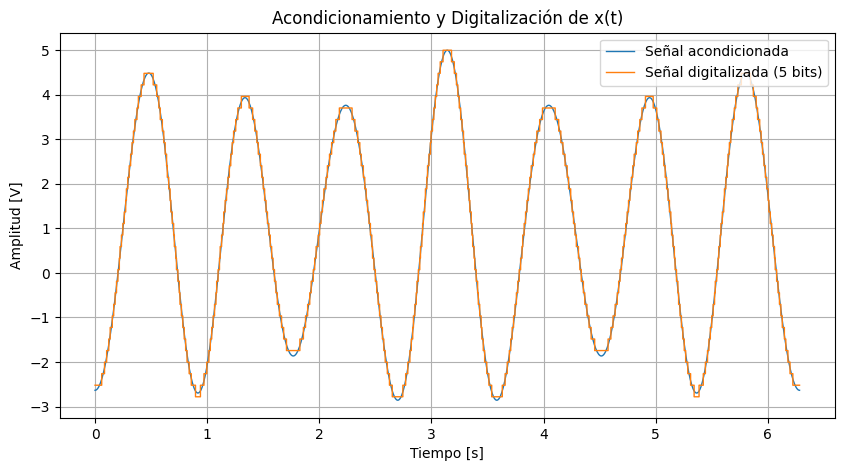

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(t, x_scaled, label="Señal acondicionada", linewidth=1)
plt.step(t, x_digital, label="Señal digitalizada (5 bits)", where='mid', linewidth=1)
plt.title("Acondicionamiento y Digitalización de x(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.legend()
plt.show()

# Punto 2 - Discretización de Señal con ADC
Se analiza la señal:
$$ x(t) = 3 \cos(1000\pi t) + 5 \sin(2000\pi t) + \cos(11000\pi t) $$

Usando un conversor analógico-digital (ADC) con frecuencia de muestreo de **5 kHz**.
Se simula la señal y su discretización para analizar el efecto del muestreo.


## Paso 1: Definir la señal continua y parámetros


In [67]:
import numpy as np
import matplotlib.pyplot as plt


fs = 110000  #Frecuencia de muestreo original de 5000hz
Ts = 1 / fs  # Priodo de muestreo
t = np.arange(0, 2e-3, Ts)

# Señal continua evaluada en tiempos discretos
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

## Paso 2: Graficar la señal muestreada


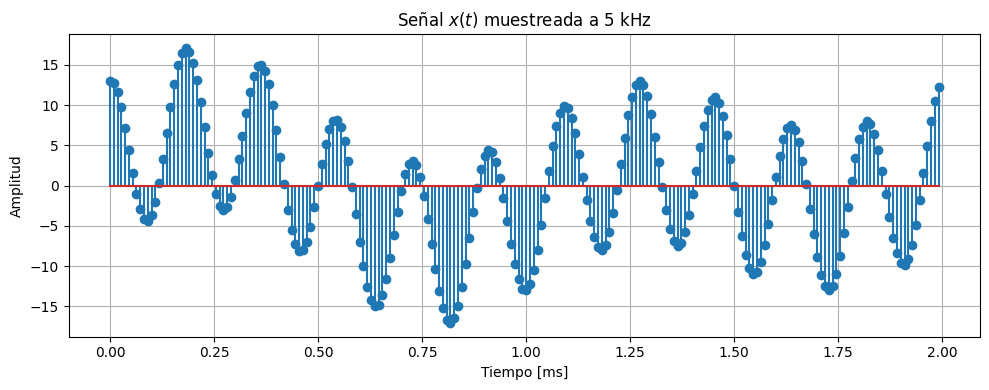

In [68]:
plt.figure(figsize=(10,4))
plt.stem(t*1e3, x_t)
plt.title('Señal $x(t)$ muestreada a 5 kHz')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.tight_layout()
plt.show()

Pese a que con una frecuencia de muestreo de 5 khz se puede interpretar una señal esta no es lo suficientemente cercana a la real ya que la fs minima utilizando el teorema de Nyquist debe de ser de 11 khz.

# Punto 3 - Distancia media entre dos señales

Se definen las señales:

- $x_1(t) = A \cos(w_0 t), \quad w_0 = \frac{2\pi}{T}$
- $x_2(t) =
\begin{cases}
1 & \text{si } 0 \leq t < \frac{T}{4} \\
-1 & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \text{si } \frac{3T}{4} \leq t < T
\end{cases}
$

La distancia media se define como:

$$
d(x_1, x_2) = \frac{1}{T} \int_0^T (x_1(t) - x_2(t))^2 \, dt
$$

Expandimos el cuadrado:

$$
d(x_1, x_2) = \frac{1}{T} \int_0^T \left[ x_1^2(t) + x_2^2(t) - 2x_1(t)x_2(t) \right] dt
$$


In [70]:
import sympy as sp

# Definir variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True) #Definimos las variables
w0 = 2 * sp.pi / T                                      #como tipo simbolo

# Definir señales
x1 = A * sp.cos(w0 * t)                                #definimos X1(t)

# Definición por partes de x2(t)                       #definimos X2(t),al ser
x2 = sp.Piecewise(                                     #por partes usamos
    (1, (t >= 0) & (t < T/4)),                         #piecewise
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Término 1: x1^2(t)
x1_sq = x1**2                                          #Desarrollo primera parte
int_x1_sq = sp.integrate(x1_sq, (t, 0, T)) / T         #de la integral
display(sp.simplify(int_x1_sq))                        #Deberia dar A^2 / 2

# Término 2: x2^2(t)
x2_sq = x2**2                                          #Desarrollo segunda parte
int_x2_sq = sp.integrate(x2_sq, (t, 0, T)) / T         #de la integral
display(sp.simplify(int_x2_sq))                        #Deberia dar 1

# Término 3: 2 * x1(t) * x2(t)
cross_term = 2 * x1 * x2
int_cross = sp.integrate(cross_term, (t, 0, T)) / T    #Desarrollo ultima parte
int_cross_simplified = sp.simplify(int_cross)          #de la integral
display(int_cross_simplified)                          # Deberia dar 4A / pi

# Distancia media
distance = int_x1_sq + int_x2_sq - int_cross          #Y sumamos el resultado de
distance_simplified = sp.simplify(distance)           #las integrales
display(distance_simplified)


A**2/2

1

4*A/pi

A**2/2 - 4*A/pi + 1

 Resultado esperado:

$$ d(x_1, x_2) = \frac{A^2}{2} + 1 - \frac{4A}{\pi}$$


Este resultado representa la distancia media entre una señal cosenoidal y una señal cuadrada por partes dentro de un mismo periodo \( T \).


# Punto 4: Serie de Fourier desde la segunda derivada \( x''(t) \)

Se estudia una señal periódica \( x(t) \) definida por tramos como se muestra en la Figura 1. Esta señal presenta transiciones lineales y constantes, y su derivada segunda \( x''(t) \) está compuesta por impulsos (deltas de Dirac).

## Fórmula para los coeficientes de la serie exponencial

A partir de:

$$
x''(t) = \sum \text{impulsos de Dirac en los puntos de quiebre}
$$

Se deduce que los coeficientes \( c_n \) de la serie exponencial de Fourier son:

$$
c_n = \frac{2j A_1}{T n^2 \omega_0^2} \left[ \sin(n \omega_0 d_1) - \sin(n \omega_0 d_2) \right]
$$

donde:

- \( T \): periodo de la señal,
- \( \omega_0 = \frac{2\pi}{T} \): frecuencia angular fundamental,
- \( A_1 = \frac{A}{d_2 - d_1} \): pendiente en los tramos lineales,
- \( d_1 \) y \( d_2 \): puntos de transición en la señal.

Luego se reconstruye la señal con \( n \in \{-5, \ldots, 5\} \) y se compara con la original para calcular el error relativo:

$$
\text{Error relativo} = \frac{\| x(t) - \hat{x}(t) \|_2}{\| x(t) \|_2}
$$


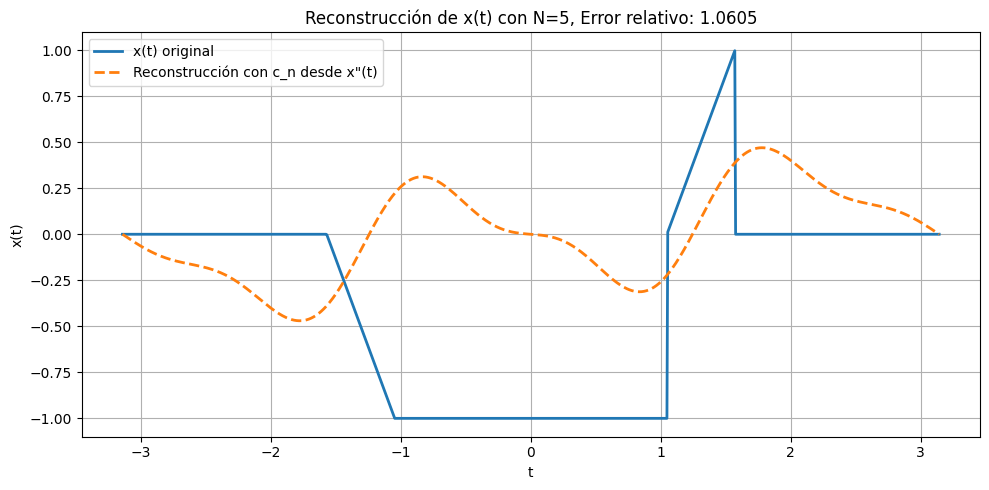

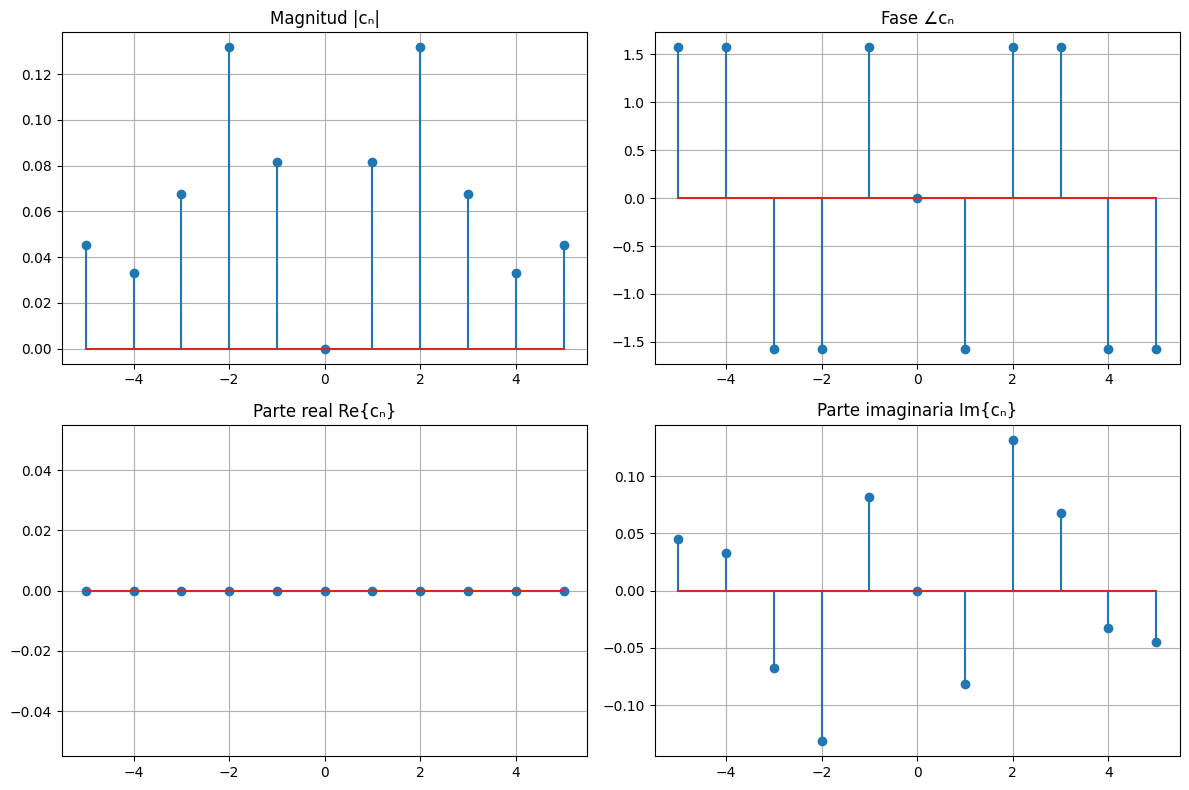

In [3]:
# Fourier series reconstruction from x''(t) — Punto 4 del parcial
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal periódica
T = 2*np.pi                   # Periodo fundamental
w0 = 2*np.pi / T              # Frecuencia angular fundamental
d1 = np.pi / 3                # Límite del tramo plano negativo
d2 = np.pi / 2                # Límite del tramo inclinado positivo
A = 1                         # Amplitud máxima de la señal
A1 = A / (d2 - d1)            # Pendiente de los tramos lineales

# Dominio temporal para visualización
t = np.linspace(-T/2, T/2, 1000)

# Definición de la señal x(t) por tramos
# Según la figura, tiene tramos lineales y constantes

def x_t(t):
    x = np.zeros_like(t)
    for i in range(len(t)):
        if -d2 <= t[i] < -d1:
            x[i] = -A1*(t[i] + d2)              # Tramo lineal descendente
        elif -d1 <= t[i] < d1:
            x[i] = -A                           # Tramo constante
        elif d1 <= t[i] < d2:
            x[i] = A1*(t[i] - d1)               # Tramo lineal ascendente
        else:
            x[i] = 0                            # Zonas planas fuera del soporte
    return x

x_vals = x_t(t)

# Cálculo del coeficiente c_n usando la derivada segunda x''(t)
# Basado en deltas de Dirac en los puntos de quiebre

def c_n(n):
    if n == 0:
        return 0  # c0 no se calcula desde x''(t)
    # Handle the n=0 case to avoid division by zero
    if n == 0:
        # For n=0, c_0 is the average value of the function.
        # Since the function is symmetric around 0 and the positive/negative
        # areas under the linear ramps might cancel the negative constant
        # part, the average value can be calculated by integrating x(t) over a period T
        # and dividing by T. Given the shape, c0 should be calculated separately.
        # Since the formula provided is for n != 0, we'll return 0 as indicated in the comment,
        # acknowledging that this formula doesn't provide c0.
        return 0
    factor = 2j * A1 / (T * (n**2) * (w0**2))
    return factor * (np.sin(n*w0*d1) - np.sin(n*w0*d2))

# Reconstrucción de x(t) usando la suma de Fourier con 11 coeficientes
N = 5
x_rec = np.zeros_like(t, dtype=complex)
for n in range(-N, N+1):
    x_rec += c_n(n) * np.exp(1j * n * w0 * t)  # Serie exponencial de Fourier

x_rec_real = np.real(x_rec)  # Solo tomamos la parte real

# Función para calcular el error relativo entre señal original y reconstruida
def relative_error(x_true, x_approx):
    # Add a small epsilon to the denominator to avoid division by zero
    # if x_true is all zeros (though unlikely for this signal)
    return np.linalg.norm(x_true - x_approx) / (np.linalg.norm(x_true) + 1e-9)

error = relative_error(x_vals, x_rec_real)

# Gráfica comparativa entre la señal original y la reconstruida
plt.figure(figsize=(10, 5))
plt.plot(t, x_vals, label='x(t) original', linewidth=2)
plt.plot(t, x_rec_real, '--', label='Reconstrucción con c_n desde x"(t)', linewidth=2)
plt.title(f"Reconstrucción de x(t) con N={N}, Error relativo: {error:.4f}")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Espectro de Fourier: magnitud, fase, parte real e imaginaria
n_vals = np.arange(-N, N+1)
# Recalculate c_vals including the n=0 case explicitly if needed for plotting,
# but based on the provided formula returning 0 for n=0, we'll use that.
c_vals = np.array([c_n(n) for n in n_vals])

plt.figure(figsize=(12, 8))

# Magnitud |c_n|
plt.subplot(2,2,1)
plt.stem(n_vals, np.abs(c_vals)) # Removed use_line_collection
plt.title("Magnitud |cₙ|")
plt.grid(True)

# Fase ∠c_n
plt.subplot(2,2,2)
plt.stem(n_vals, np.angle(c_vals)) # Removed use_line_collection
plt.title("Fase ∠cₙ")
plt.grid(True)

# Parte real de c_n
plt.subplot(2,2,3)
plt.stem(n_vals, np.real(c_vals)) # Removed use_line_collection
plt.title("Parte real Re{cₙ}")
plt.grid(True)

# Parte imaginaria de c_n
plt.subplot(2,2,4)
plt.stem(n_vals, np.imag(c_vals)) # Removed use_line_collection
plt.title("Parte imaginaria Im{cₙ}")
plt.grid(True)

plt.tight_layout()
plt.show()